# Simplified Arm Mode

## Introduction

This notebook presents the analytical derivations of the equations of motion for
three degrees of freedom and nine muscles arm model, some of them being
bi-articular, appropriately constructed to demonstrate both kinematic and
dynamic redundancy (e.g.  $d < n < m$). The model is inspired from [1] with some
minor modifications and improvements.

## Model Constants

Abbreviations:

- DoFs: Degrees of Freedom
- EoMs: Equations of Motion
- KE: Kinetic Energy
- PE: Potential Energy
- CoM: center of mass

The following constants are used in the model:

- $m$ mass of a segment
- $I_{z_i}$ inertia around $z$-axis
- $L_i$ length of a segment
- $L_{c_i}$ length of the CoM as defined in local frame of a body
- $a_i$ muscle origin point as defined in the local frame of a body
- $b_i$ muscle insertion point as defined in the local frame of a body
- $g$ gravity
- $q_i$ are the generalized coordinates
- $u_i$ are the generalized speeds
- $\tau$ are the generalized forces

Please note that there are some differences from [1]: 1) $L_{g_i} \rightarrow
L_{c_i}$, 2) $a_i$ is always the muscle origin, 3) $b_i$ is always the muscle
insertion and 4) we don't use double indexing for the bi-articular muscles.

In [1]:
# notebook general configuration

%load_ext autoreload
%autoreload 2

# imports and utilities
import sympy as sp
from IPython.display import display, Image
sp.interactive.printing.init_printing()

import logging
logging.basicConfig(level=logging.INFO)

# plot
%matplotlib inline
from matplotlib.pyplot import *
rcParams['figure.figsize'] = (10.0, 6.0)

# utility for displaying intermediate results
enable_display  = True
def disp(*statement):
    if (enable_display):
        display(*statement)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# construct model
from model import ArmModel
model = ArmModel(use_gravity=1, use_coordinate_limits=0, use_viscosity=0)

disp(model.constants)

## Dynamics

The simplified arm model has three DoFs and nine muscles, some of them being
bi-articular. The analytical expressions of the EoMs form is given by


\begin{equation}\label{equ:eom-standard-form}
  M(q) \ddot{q} + C(q, \dot{q})\dot{q} + \tau_g(q) = \tau
\end{equation}


where $M \in \Re^{n \times n}$ represents the inertia mass matrix, $n$ the DoFs
of the model, $q, \dot{q}, \ddot{q} \in \Re^{n}$ the generalized coordinates and
their derivatives, $C \in \Re^{n \times n}$ the Coriolis and centrifugal matrix,
$\tau_g \in \Re^{n}$ the gravity contribution and $\tau$ the specified
generalized forces.

As the model is an open kinematic chain a simple procedure to derive the EoMs
can be followed. Assuming that the spatial velocity (translational, rotational)
of each body segment is given by $u_b = [v, \omega]^T \in \Re^{6 \times 1}$, the
KE of the system in body local coordinates is defined as


\begin{equation}\label{equ:spatial-ke}
  K = \frac{1}{2} \sum\limits_{i=1}^{n_b} (m_i v_i^2 + I_i \omega_i^2) =
  \frac{1}{2} \sum\limits_{i=1}^{n_b} u_i^T M_i u_i
\end{equation}
 

where $M_i = diag(m_i, m_i, m_i, [I_i]_{3 \times 3}) \in \Re^{6 \times 6}$
denotes the spatial inertia mass matrix, $m_i$ the mass and $I_i \in \Re^{3
\times 3}$ the inertia matrix of body $i$. The spatial quantities are related
to the generalized coordinates by the body Jacobian $u_b = J_b \dot{q}, \; J_b
\in \Re^{6 \times n}$. The total KE is coordinate invariant, thus it can be
expressed in different coordinate system
 

\begin{equation}\label{equ:ke-transformation}
  K = \frac{1}{2} \sum\limits_{i=1}^{n_b} q^T J_i^T M_i J_i q
\end{equation}


Following the above definition, the inertia mass matrix of the system can be
written as

 
\begin{equation}\label{equ:mass-matrix}
  M(q) =  \sum\limits_{i=1}^{n_b}  J_i^T M_i J_i
\end{equation}
 

Furthermore, the Coriolis and centrifugal forces $C(q, \dot{q}) \dot{q}$ can be
determined directly from the inertia mass matrix


\begin{equation}\label{equ:coriolis-matrix}
  C_{ij}(q, \dot{q}) = \sum\limits_{k=1}^{n} \Gamma_{ijk} \; \dot{q}_k, \; i, j
  \in [1, \dots n], \;
  \Gamma_{ijk} = \frac{1}{2} (
  \frac{\partial M_{ij}(q)}{\partial q_k} +
  \frac{\partial M_{ik}(q)}{\partial q_j} -
  \frac{\partial M_{kj}(q)}{\partial q_i})
\end{equation}


where the functions $\Gamma_{ijk}$ are called the Christoffel symbols. The
gravity contribution can be determined from the PE function
 

\begin{equation}\label{equ:gravity-pe}
  \begin{gathered}
    g(q) = \frac{\partial V(q)}{\partial q}, \; V(q) = \sum\limits_{i=1}^{n_b} m_i g h_i(q)
  \end{gathered}
\end{equation}


where $h_i(q)$ denotes the vertical displacement of body $i$ with respect to the
ground. In this derivation we chose to collect all forces that act on the system
in the term $f(q, \dot{q})$.

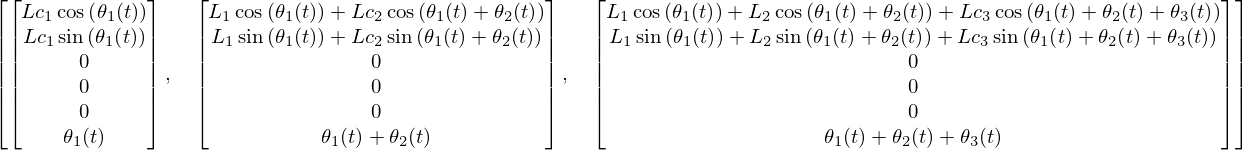

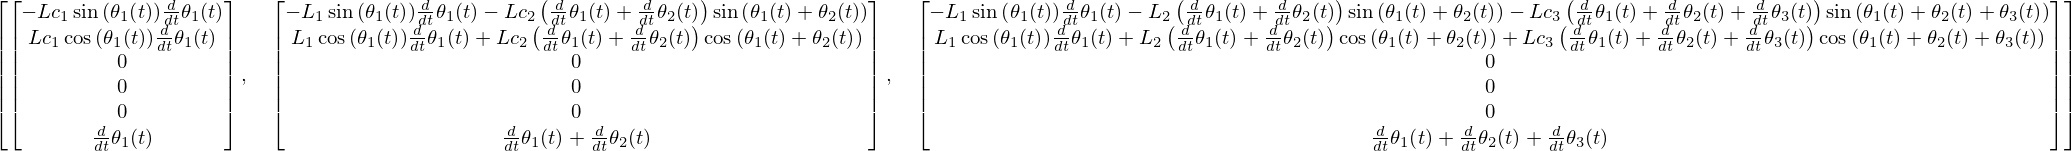

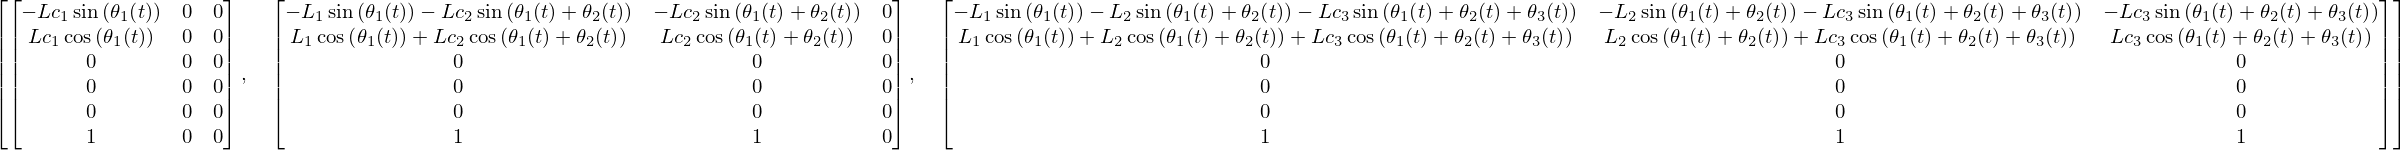

In [3]:
# define the spatial coordinates for the CoM in terms of Lcs' and q's
disp(model.xc[1:])
# define CoM spatial velocities
disp(model.vc[1:])
#define CoM Jacobian
disp(model.Jc[1:])

In [4]:
# generate the inertial mass matrix
M = model.M
for i in range(0, M.shape[0]):
    for j in range(0, M.shape[1]):
        disp('M_{' + str(i + 1) + ',' + str(j + 1) + '} = ', M[i, j])

'M_{1,1} = '

'M_{1,2} = '

'M_{1,3} = '

'M_{2,1} = '

'M_{2,2} = '

'M_{2,3} = '

'M_{3,1} = '

'M_{3,2} = '

'M_{3,3} = '

'f_1 = '

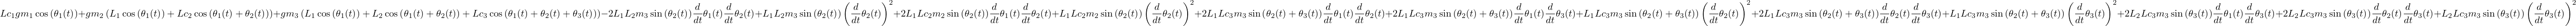

'f_2 = '

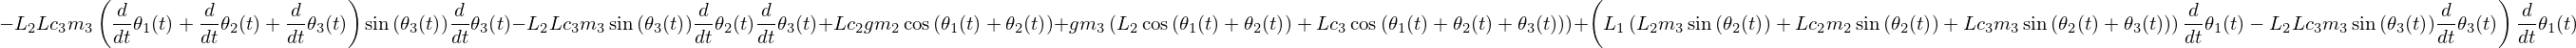

'f_3 = '

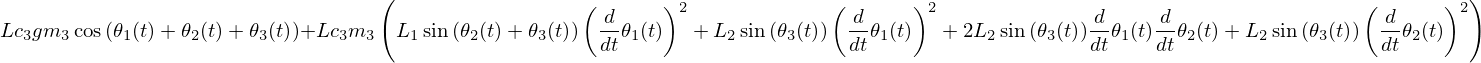

In [5]:
# total forces from Coriolis, centrafugal and gravity
f = model.f
for i in range(0, f.shape[0]):
    disp('f_' + str(i + 1) + ' = ',  f[i])

## Muscle Moment Arm

The muscle forces $f_m$ are transformed into joint space generalized forces
($\tau$) by the moment arm matrix ($\tau = -R^T f_m$). For a n-lateral polygon
it can be shown that the derivative of the side length with respect to the
opposite angle is the moment arm component. As a consequence, when expressing
the muscle length as a function of the generalized coordinates of the model, the
moment arm matrix is evaluated by $R = \frac{\partial l_{mt}}{\partial q}$. The
analytical expressions of the EoMs following our convention are provided below

\begin{equation}\label{equ:eom-notation}
  \begin{gathered}
    M(q) \ddot{q} + f(q, \dot{q}) = \tau \\
    \tau = -R^T(q) f_m
  \end{gathered}
\end{equation}

'l_m = '

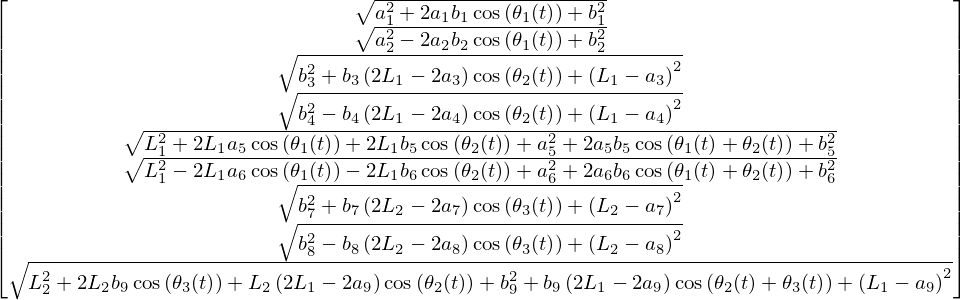

'R = '

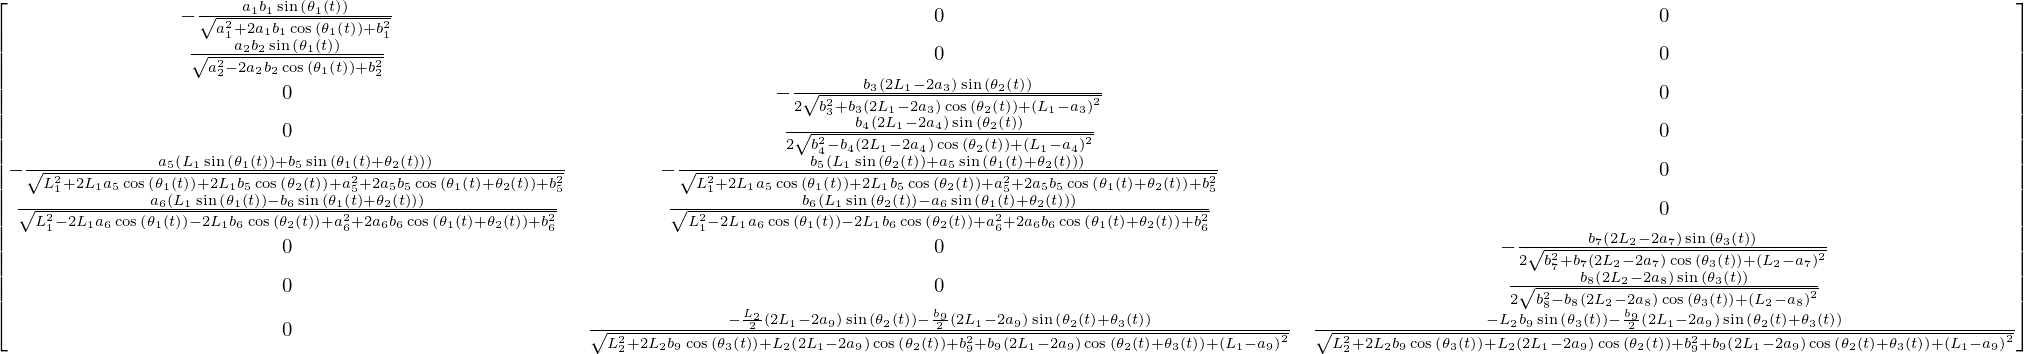

In [6]:
# assert that moment arm is correctly evaluated
# model.test_muscle_geometry() # slow
# muscle length
disp('l_m = ', model.lm)
# moment arm
disp('R = ', model.R)

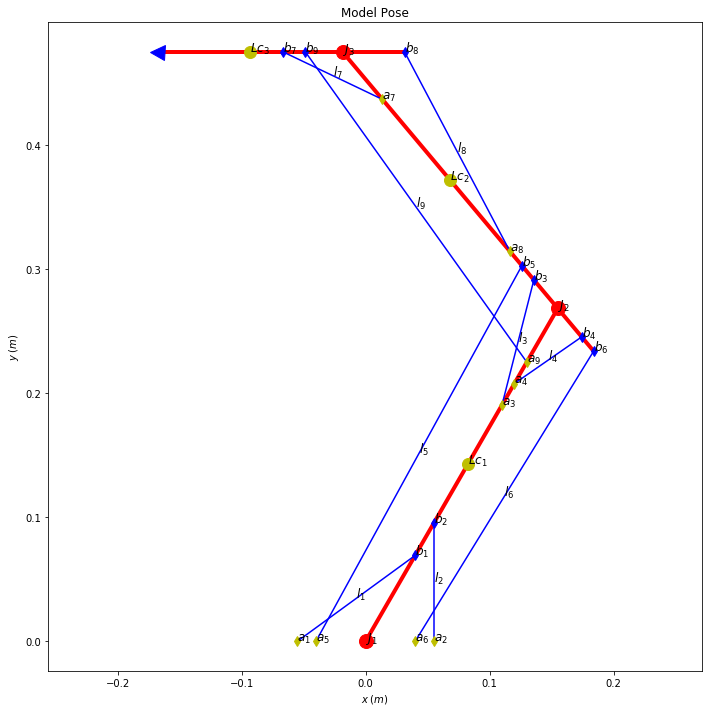

In [7]:
# draw model
fig, ax = subplots(1, 1, figsize=(10, 10), frameon=False)
model.draw_model([60, 70, 50], True, ax, 1, False)
fig.tight_layout()
fig.savefig('results/arm_model.pdf', dpi=600, format='pdf',
            transparent=True, pad_inches=0, bbox_inches='tight')

[1] K. Tahara, Z. W. Luo, and S. Arimoto, “On Control Mechanism of Human-Like
Reaching Movements with Musculo-Skeletal Redundancy,” in International
Conference on Intelligent Robots and Systems, 2006, pp. 1402–1409.